In [1]:
import os
os.chdir("../..")

In [2]:
import torch
from utils.dataset_loader import *
from utils.model_utils import *
from utils.train_utils import *
from utils.metrics import *
from utils.visualization import *

c:\Users\Yash\Documents\Development\Projects\final_year\env\Lib\site-packages\albumentations\__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.23). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"[INFO] Using device: {device}")

[INFO] Using device: cuda


In [4]:
data_dir = "wildfire_dataset_scaled"
batch_size = 32
learning_rate = 0.0005
num_classes = 2
model_name = "resnet18"
output_dir = "outputs/models/augmented"
metrics_output_dir = "outputs/plots/augmented"
os.makedirs(output_dir, exist_ok=True)


In [5]:
print("[INFO] Loading augmented datasets...")
train_loader, val_loader, test_loader = load_datasets(
    data_dir=data_dir, batch_size=batch_size, augmentation="augmented"
)
print("[INFO] Augmented datasets loaded successfully!")

2024-12-25 15:20:16,116 - INFO - Loading datasets from wildfire_dataset_scaled with augmentation type 'augmented'.
2024-12-25 15:20:16,117 - INFO - Applying selected augmentations for wildfire scenarios.
2024-12-25 15:20:16,128 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/train
2024-12-25 15:20:16,131 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/val
2024-12-25 15:20:16,134 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/test
2024-12-25 15:20:16,134 - INFO - Datasets initialized. Preparing DataLoaders...
2024-12-25 15:20:16,135 - INFO - Using WeightedRandomSampler for class balancing.
2024-12-25 15:20:16,135 - INFO - Computing class weights from directory: wildfire_dataset_scaled/train
2024-12-25 15:20:16,137 - INFO - Class 'fire' has 730 samples.
2024-12-25 15:20:16,140 - INFO - Class 'nofire' has 1157 samples.
2024-12-25 15:20:16,140 - INFO - Computed class weights: {'fire': 1.0, 'nofire': 

[INFO] Loading augmented datasets...


2024-12-25 15:20:24,157 - INFO - DataLoaders created successfully.


[INFO] Augmented datasets loaded successfully!


In [6]:
# Initialize the model
print(f"\n[INFO] Starting Training for Model: {model_name} with Augmented Data\n")
print(f"[INFO] Initializing {model_name} model...")
model = initialize_model(
    model_name=model_name,
    num_classes=num_classes,
    pretrained=True,
    freeze_all=True  # Baseline augmentation: Freeze all layers
)
print("[INFO] Model initialized successfully!")


[INFO] Starting Training for Model: resnet18 with Augmented Data

[INFO] Initializing resnet18 model...
[INFO] Model initialized successfully!


In [7]:
# Define loss function and optimizer
print("[INFO] Setting up loss function and optimizer...")
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)
print("[INFO] Loss function and optimizer set up!")

[INFO] Setting up loss function and optimizer...
[INFO] Loss function and optimizer set up!


In [8]:
# Train the model

from torch.optim.lr_scheduler import StepLR

import time

# Start the timer
start_time = time.time()
print("Training started...")


scheduler = StepLR(optimizer, step_size=5, gamma=0.5)
print("[INFO] Starting model training with augmented data...")
history = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=scheduler,  # No LR scheduler for augmented baseline
    device=device,
    save_path=os.path.join(output_dir, f"{model_name}.pth"),
    early_stop_patience=14,  # Early stopping patience
    monitor_metric="val_f1"
)
print("[INFO] Training completed successfully!")

# Calculate and display elapsed time
end_time = time.time()
elapsed_time = end_time - start_time

# Format elapsed time as hours, minutes, and seconds
hours = int(elapsed_time // 3600)
minutes = int((elapsed_time % 3600) // 60)
seconds = int(elapsed_time % 60)

print(f"Training completed in {hours} hours, {minutes} minutes, and {seconds} seconds.")


Training started...
[INFO] Starting model training with augmented data...

Starting training...



[INFO] Learning rate adjusted to: 0.000500
[INFO] Best model saved with val_f1: 0.7838
Epoch [1]: Train Loss: 0.7270, Train Acc: 0.5702 | Val Loss: 0.5558, Val Acc: 0.7338, Val Recall: 0.7886, Val F1: 0.7838


[INFO] Learning rate adjusted to: 0.000500
[INFO] Best model saved with val_f1: 0.8186
Epoch [2]: Train Loss: 0.5732, Train Acc: 0.6937 | Val Loss: 0.5030, Val Acc: 0.7861, Val Recall: 0.7886, Val F1: 0.8186


[INFO] Learning rate adjusted to: 0.000500
[INFO] Best model saved with val_f1: 0.8571
Epoch [3]: Train Loss: 0.5462, Train Acc: 0.7340 | Val Loss: 0.4419, Val Acc: 0.8109, Val Recall: 0.9268, Val F1: 0.8571


[INFO] Learning rate adjusted to: 0.000500
[INFO] No improvement in val_f1. Patience: 1/14
Epoch [4]: Train Loss: 0.4908, Train Acc: 0.7525 | Val Loss: 0.4347, Val Acc: 0.7960, Val Recall: 0.8496, Val F1: 0.8360


[INFO] Learning rate adjusted to: 0.000250
[INFO] No improvement in val_f1. Patience: 2/14
Epoch [5]: Train Loss: 0.4966, Train Acc: 0.7573 | Val Loss: 0.4498, Val Acc: 0.7935, Val Recall: 0.7724, Val F1: 0.8207


[INFO] Learning rate adjusted to: 0.000250
[INFO] Best model saved with val_f1: 0.8704
Epoch [6]: Train Loss: 0.4627, Train Acc: 0.7848 | Val Loss: 0.4070, Val Acc: 0.8333, Val Recall: 0.9146, Val F1: 0.8704


[INFO] Learning rate adjusted to: 0.000250
[INFO] No improvement in val_f1. Patience: 1/14
Epoch [7]: Train Loss: 0.4972, Train Acc: 0.7658 | Val Loss: 0.4194, Val Acc: 0.8109, Val Recall: 0.8862, Val F1: 0.8516


[INFO] Learning rate adjusted to: 0.000250
[INFO] No improvement in val_f1. Patience: 2/14
Epoch [8]: Train Loss: 0.4475, Train Acc: 0.7928 | Val Loss: 0.4230, Val Acc: 0.8085, Val Recall: 0.8374, Val F1: 0.8425


[INFO] Learning rate adjusted to: 0.000250
[INFO] No improvement in val_f1. Patience: 3/14
Epoch [9]: Train Loss: 0.4367, Train Acc: 0.7944 | Val Loss: 0.4165, Val Acc: 0.8085, Val Recall: 0.8902, Val F1: 0.8505


[INFO] Learning rate adjusted to: 0.000125
[INFO] No improvement in val_f1. Patience: 4/14
Epoch [10]: Train Loss: 0.4566, Train Acc: 0.7833 | Val Loss: 0.4087, Val Acc: 0.8184, Val Recall: 0.8659, Val F1: 0.8537


[INFO] Learning rate adjusted to: 0.000125
[INFO] No improvement in val_f1. Patience: 5/14
Epoch [11]: Train Loss: 0.4258, Train Acc: 0.8066 | Val Loss: 0.4061, Val Acc: 0.8209, Val Recall: 0.8902, Val F1: 0.8588


[INFO] Learning rate adjusted to: 0.000125
[INFO] No improvement in val_f1. Patience: 6/14
Epoch [12]: Train Loss: 0.4417, Train Acc: 0.7843 | Val Loss: 0.4097, Val Acc: 0.8159, Val Recall: 0.9065, Val F1: 0.8577


[INFO] Learning rate adjusted to: 0.000125
[INFO] No improvement in val_f1. Patience: 7/14
Epoch [13]: Train Loss: 0.4222, Train Acc: 0.8034 | Val Loss: 0.4049, Val Acc: 0.8159, Val Recall: 0.9187, Val F1: 0.8593


[INFO] Learning rate adjusted to: 0.000125
[INFO] No improvement in val_f1. Patience: 8/14
Epoch [14]: Train Loss: 0.4264, Train Acc: 0.8066 | Val Loss: 0.4253, Val Acc: 0.8109, Val Recall: 0.8780, Val F1: 0.8504


[INFO] Learning rate adjusted to: 0.000063
[INFO] No improvement in val_f1. Patience: 9/14
Epoch [15]: Train Loss: 0.4044, Train Acc: 0.8140 | Val Loss: 0.4128, Val Acc: 0.8259, Val Recall: 0.9268, Val F1: 0.8669


[INFO] Learning rate adjusted to: 0.000063
[INFO] No improvement in val_f1. Patience: 10/14
Epoch [16]: Train Loss: 0.4297, Train Acc: 0.8039 | Val Loss: 0.3837, Val Acc: 0.8383, Val Recall: 0.8780, Val F1: 0.8692


[INFO] Learning rate adjusted to: 0.000063
[INFO] No improvement in val_f1. Patience: 11/14
Epoch [17]: Train Loss: 0.4285, Train Acc: 0.8007 | Val Loss: 0.3876, Val Acc: 0.8333, Val Recall: 0.8902, Val F1: 0.8673


[INFO] Learning rate adjusted to: 0.000063
[INFO] No improvement in val_f1. Patience: 12/14
Epoch [18]: Train Loss: 0.4329, Train Acc: 0.7933 | Val Loss: 0.4161, Val Acc: 0.8134, Val Recall: 0.9187, Val F1: 0.8577


[INFO] Learning rate adjusted to: 0.000063
[INFO] No improvement in val_f1. Patience: 13/14
Epoch [19]: Train Loss: 0.4132, Train Acc: 0.8166 | Val Loss: 0.3990, Val Acc: 0.8184, Val Recall: 0.8659, Val F1: 0.8537


[INFO] Learning rate adjusted to: 0.000031
[INFO] No improvement in val_f1. Patience: 14/14
Epoch [20]: Train Loss: 0.4278, Train Acc: 0.7970 | Val Loss: 0.4009, Val Acc: 0.8134, Val Recall: 0.8577, Val F1: 0.8491
[INFO] Final metrics saved to outputs/models/augmented\final_metrics.json
[INFO] Training stopped after 20 epochs. Best val_f1: 0.8704

[INFO] Training completed successfully!
Training completed in 0 hours, 4 minutes, and 20 seconds.


In [9]:
# Evaluate the model
print("[INFO] Evaluating the model...")
metrics = evaluate_model(
    model=model,
    test_loader=test_loader,
    classes=["No Fire", "Fire"],
    device=device,
    model_name=model_name,
    save_base_path=metrics_output_dir + f"/{model_name}_augmented"
)
print(f"\n[INFO] Metrics for {model_name} with Augmented Data:\n{metrics}")

[INFO] Evaluating the model...
[INFO] Evaluation metrics saved to outputs/plots/augmented/resnet18_augmented\resnet18\resnet18_evaluation.json

[INFO] Metrics for resnet18 with Augmented Data:
{'classification_report': {'No Fire': {'precision': 0.83125, 'recall': 0.8364779874213837, 'f1-score': 0.8338557993730408, 'support': 159.0}, 'Fire': {'precision': 0.896, 'recall': 0.8924302788844621, 'f1-score': 0.8942115768463074, 'support': 251.0}, 'accuracy': 0.8707317073170732, 'macro avg': {'precision': 0.8636250000000001, 'recall': 0.864454133152923, 'f1-score': 0.8640336881096741, 'support': 410.0}, 'weighted avg': {'precision': 0.8708896341463415, 'recall': 0.8707317073170732, 'f1-score': 0.8708053119237478, 'support': 410.0}}, 'confusion_matrix': [[133, 26], [27, 224]], 'roc_auc': 0.9342504197048285, 'y_true': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

[INFO] Saving training and evaluation results...
[INFO] Training plot saved to outputs/plots/augmented\resnet18_augmented_training_curve.png
[INFO] Confusion matrix saved to outputs/plots/augmented\resnet18_augmented_confusion_matrix.png
[INFO] ROC curve saved to outputs/plots/augmented\resnet18_augmented_roc_curve.png
[INFO] Precision-Recall curve saved to outputs/plots/augmented\resnet18_augmented_precision_recall.png
[INFO] All results saved successfully!


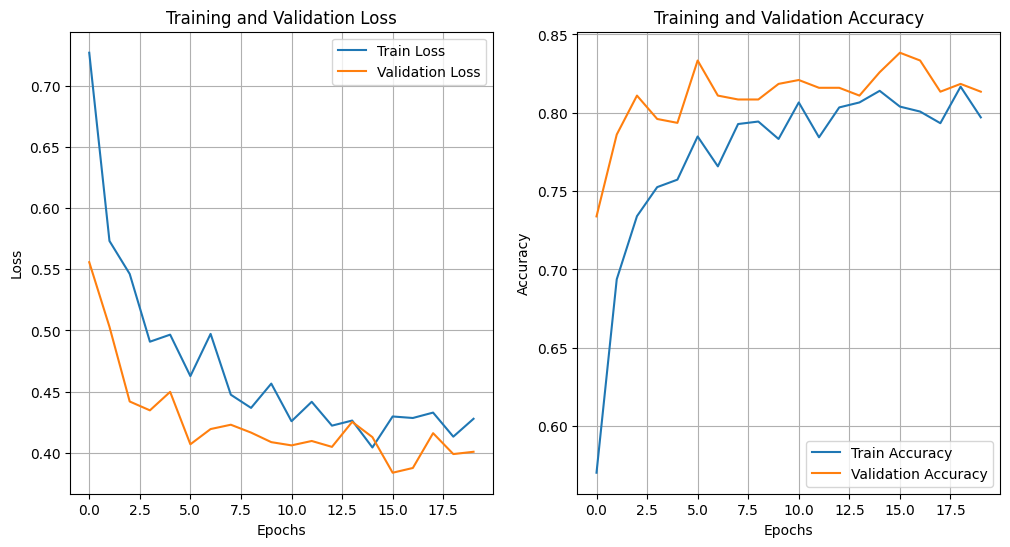

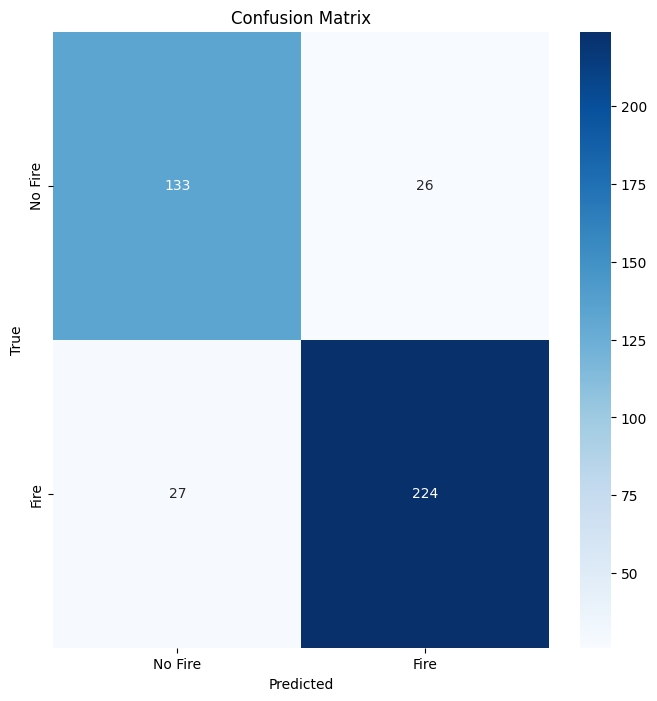

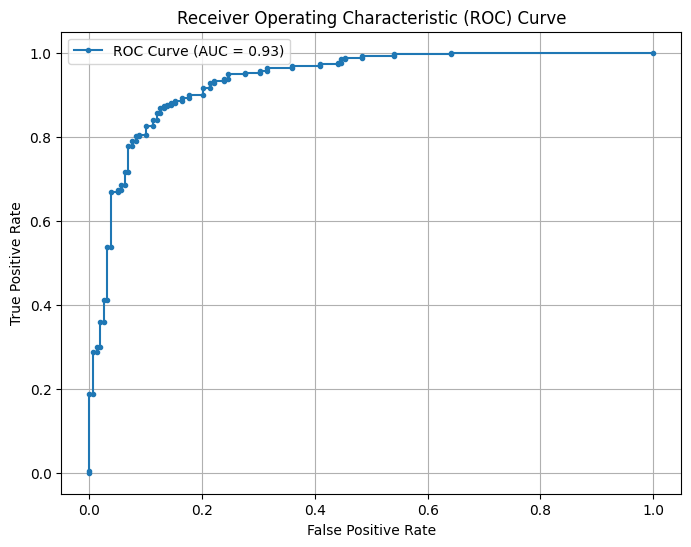

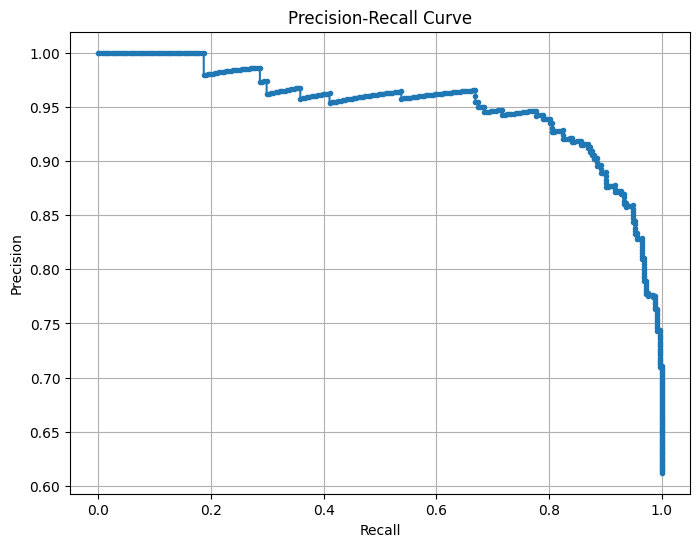

: 

In [10]:
print("[INFO] Saving training and evaluation results...")

# Training curve
plot_training(
    history, output_path=os.path.join(metrics_output_dir, f"{model_name}_augmented_training_curve.png")
)

# Confusion matrix
plot_confusion_matrix(
    cm=metrics["confusion_matrix"],
    classes=["No Fire", "Fire"],
    output_path=os.path.join(metrics_output_dir, f"{model_name}_augmented_confusion_matrix.png")
)

# ROC Curve
plot_roc_curve(
    y_true=metrics["y_true"],
    y_scores=metrics["y_scores"],
    output_path=os.path.join(metrics_output_dir, f"{model_name}_augmented_roc_curve.png")
)

# Precision-Recall Curve
plot_precision_recall(
    y_true=metrics["y_true"],
    y_scores=metrics["y_scores"],
    output_path=os.path.join(metrics_output_dir, f"{model_name}_augmented_precision_recall.png")
)

print("[INFO] All results saved successfully!")